In [2]:
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor, plot_tree
# from sklearn.datasets import make_regression
# import numpy as np
# import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
# from models.modelsFDH import FDH
# import eat
# import graphviz
# from utils.is_efficient import is_efficient
# from utils.datainput import initializeUnif

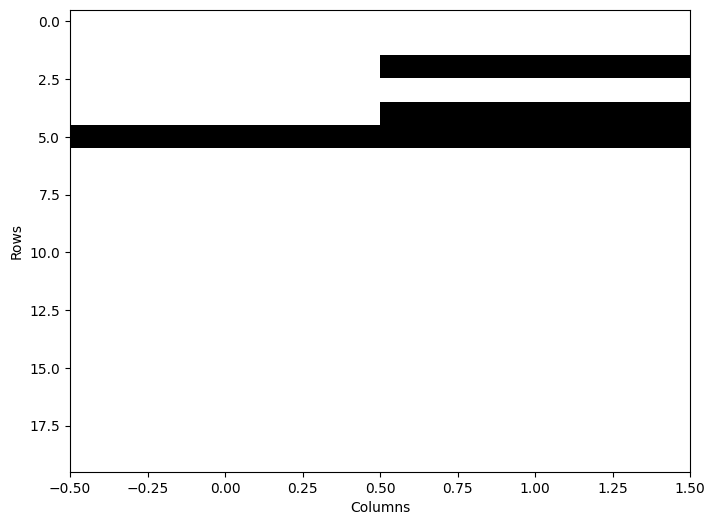

(array([[23.41056116, 20.18498287],
        [24.03643853, 29.01014826],
        [21.79954834, 26.08202034],
        [25.49518713, 22.02131192],
        [29.70397089, 20.40928989],
        [29.23879815, 27.22743138],
        [26.51718434, 21.07251244],
        [23.70759984, 23.33741003],
        [29.65572107, 26.50116791],
        [24.15724055, 20.0019379 ],
        [20.59944972, 25.2226259 ],
        [27.18659965, 21.94107301],
        [23.19365234, 23.52448152],
        [21.42915962, 24.47139453],
        [21.34861281, 29.13876852],
        [26.59104639, 28.31975545],
        [24.96353025, 25.88001978],
        [24.81311805, 20.02660492],
        [28.29171971, 28.09754824],
        [28.72362368, 25.0376344 ]]),
 array([[28.48798145, 28.13842989],
        [28.47879862, 22.91477448],
        [27.97164839,  0.        ],
        [26.78358948, 20.95570303],
        [22.63673906,  0.        ],
        [ 0.        ,  0.        ],
        [21.58044702, 27.75750387],
        [28.80307731, 25.9

In [3]:
from utils.datainput import initialize_sparse
initialize_sparse(20, 2,2 , 20, 30, 0.9)

In [3]:
# l, m = initializeUnif(50, 1, 1, 2, 6)

<!--  -->

In [4]:
# l

In [5]:
# m

In [6]:
# fdh = FDH(l, m)

In [7]:
# fdh.fdh_output_vrs()

In [8]:
# fdh.plot_fdh('fdh_output_vrs')

In [19]:
def monte_carlo_testing():
    results = {}
    for scenario_id, scenario in SCENARIOS.items():

        for n in SAMPLE_SIZES:
            mse_fdh_list, mse_eat_list = [], []
            bias_fdh_list, bias_eat_list = [], []
            abs_bias_fdh_list, abs_bias_eat_list = [], []

            for _ in range(TRIALS):

                # print("scen", scenario_id, "n", n, "_", _)
                x, y, inefficiency = generate_data(scenario, n)

                print("y", y.shape)
                print('id', scenario_id)
                print(y)

                fdh = FDH(x, y)
                df = fdh.fdh_output_vrs()
                y_fdh = y * df["efficiency"].values.reshape(-1, 1)

                df = pd.DataFrame(
                    x, columns=[f"x[{i}]" for i in range(scenario["inputs"])]
                )
                df[[f"y[{i}]" for i in range(scenario["outputs"])]] = y

                eat_model = eat.EAT(
                    df,
                    [f"x[{i}]" for i in range(scenario["inputs"])],
                    [f"y[{i}]" for i in range(scenario["outputs"])],
                    5, 5)
                eat_model.fit()

                x_p = [f"x[{i}]" for i in range(scenario["inputs"])]

                data_pred = df.loc[:, x_p]
                y_eat = eat_model.predict(data_pred, x_p)

                y_eat = y_eat[[f"p_y[{i}]" for i in range(scenario["outputs"])]]

                mse_fdh, bias_fdh, abs_bias_fdh = calculate_metrics(y, y_fdh)
                mse_fdh_list.append(mse_fdh)
                bias_fdh_list.append(bias_fdh)
                abs_bias_fdh_list.append(abs_bias_fdh)

                mse_eat, bias_eat, abs_bias_eat = calculate_metrics(y, y_eat)
                mse_eat_list.append(mse_eat)
                bias_eat_list.append(bias_eat)
                abs_bias_eat_list.append(abs_bias_eat)

            results[(scenario_id, n)] = {
                "FDH_MSE": np.mean(mse_fdh_list),
                "EAT_MSE": np.mean(mse_eat_list),
                "FDH_Bias": np.mean(bias_fdh_list),
                "EAT_Bias": np.mean(bias_eat_list),
                "FDH_AbsBias": np.mean(abs_bias_fdh_list),
                "EAT_AbsBias": np.mean(abs_bias_eat_list),
            }

    return results

def calculate_metrics(true_values, estimates):
    mse = np.mean((estimates - true_values) ** 2)
    bias = np.mean(estimates - true_values)
    abs_bias = np.mean(np.abs(estimates - true_values))
    return mse, bias, abs_bias


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import eat
import pandas as pd
from models.modelsFDH import FDH

TRIALS = 1
SAMPLE_SIZES = [12]

SCENARIOS = {
    4: {"inputs": 9,
        "outputs": 1,
        "func": lambda *x: np.prod([xi**0.1 for xi in x]),
        "inefficiency": lambda n: np.abs(np.random.normal(0, 0.4, size=n))},
}

scenario = SCENARIOS[4]
x = np.random.uniform(1, 10, size=(12, scenario["inputs"]))
x
scenario['func'](*x.T)  

def generate_data(scenario, n):
    x = np.random.uniform(1, 10, size=(n, scenario["inputs"]))
    if scenario["inputs"] == 9:        
        # for row in x:
            # print('prod', np.prod([xi**0.1 for xi in row]))
        # print(x)


        print(*x.shape)
        
        # print([xi for xi in x])
        
        
        # np.prod([xi**0.1 for xi in *x])
        
        
        y = scenario["func"](x)  # Fixed computation of y


    else:
        raise NotImplementedError("Only 1, 2, 3, and 9 inputs are supported.")

    inefficiency = scenario["inefficiency"](n)
    output = y - inefficiency
    output = output.reshape(n, scenario["outputs"])

    return x, output, inefficiency


results = monte_carlo_testing()


12 9
y (12, 1)
id 4
[[34396774.9975472 ]
 [34396775.29872268]
 [34396775.22456571]
 [34396774.75999922]
 [34396774.21053687]
 [34396775.28300351]
 [34396775.05864725]
 [34396774.99182981]
 [34396775.31279156]
 [34396775.25559931]
 [34396774.95572067]
 [34396775.23947644]]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from models.modelsFDH import FDH

TRIALS = 1
SAMPLE_SIZES = [12]

SCENARIOS = {
    4: {
        "inputs": 9,
        "outputs": 1,
        "func": lambda x: np.prod(x**0.1, axis=1, keepdims=True),  # Fixed row-wise product
        "inefficiency": lambda n: np.abs(np.random.normal(0, 0.4, size=n)),
    }
}

scenario = SCENARIOS[4]

def generate_data(scenario, n):
    x = np.random.uniform(1, 10, size=(n, scenario["inputs"]))
    
    if scenario["inputs"] == 9:        
        y = scenario["func"](x)  # Now correctly computing row-wise product

    else:
        raise NotImplementedError("Only 1, 2, 3, and 9 inputs are supported.")

    inefficiency = scenario["inefficiency"](n).reshape(n, 1)
    output = y - inefficiency

    return x, output, inefficiency

# Example usage
x, output, inefficiency = generate_data(scenario, 12)
# print("X:\n", x)
print("Y (computed output):\n", output)
# print("Inefficiency:\n", inefficiency)


Y (computed output):
 [[3.13487696]
 [3.48885629]
 [4.47141682]
 [3.85419835]
 [3.93665319]
 [4.71730741]
 [4.56507842]
 [2.89087819]
 [3.37710578]
 [4.65791749]
 [5.35054253]
 [3.39685134]]
